In [1]:
import read_data as rd
import explore_data as ed
import clean_data as cd
import create_features as cf
import build_models as bm
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split


#Importing data and l
data = rd.read_data_csv("credit-data.csv")
data_id = 'PersonID'
y='SeriousDlqin2yrs'
float_columns = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome', 'DebtRatio', ]
cat_columns =['SeriousDlqin2yrs', 'zipcode', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
cols_to_transform = ['NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']





## Exploring Data

In [2]:
#Describing data 
ed.describe_data(data,[.01, .20, .40, .60, .80, .99])


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.375870,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.618950,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.000000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1%,10034.050000,0.000000,0.000000,24.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
20%,103939.000000,0.000000,0.022025,38.000000,60618.000000,0.000000,0.135104,2.983000e+03,4.000000,0.000000,0.000000,0.000000,0.000000
40%,114590.000000,0.000000,0.098894,47.000000,60625.000000,0.000000,0.288791,4.500000e+03,6.000000,0.000000,1.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.189730,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
60%,125378.000000,0.000000,0.334872,55.000000,60625.000000,0.000000,0.473741,6.200000e+03,9.000000,0.000000,1.000000,0.000000,1.000000
80%,137785.000000,0.000000,0.810027,64.000000,60637.000000,0.000000,2.353688,9.000000e+03,12.000000,0.000000,2.000000,0.000000,2.000000


In [3]:
#missing
ed.missing_values_table(data)


Your selected dataframe has 13 columns.
There are 2 columns that have missing values.


,Nan Val,% of Total Values
MonthlyIncome,7974,19.4
NumberOfDependents,1037,2.5


In [34]:
#correlation
ed.correlation(data)


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,missing_dependants,missing_income
PersonID,1.000000,-0.622739,0.004499,0.108533,-0.021010,-0.082598,0.006864,0.019755,0.022669,-0.076856,0.004341,-0.065353,-0.030364,-0.012680,-0.017695
SeriousDlqin2yrs,-0.622739,1.000000,-0.004586,-0.173728,-0.045051,0.149334,-0.013502,-0.032810,-0.039898,0.139609,-0.010641,0.121886,0.065708,0.019576,0.032655
RevolvingUtilizationOfUnsecuredLines,0.004499,-0.004586,1.000000,-0.008003,0.006009,-0.001999,0.022250,0.005832,-0.014590,-0.001686,0.004763,-0.001413,0.005342,-0.000360,-0.006140
age,0.108533,-0.173728,-0.008003,1.000000,0.005408,-0.068696,0.038828,0.048138,0.159866,-0.069036,0.049168,-0.063622,-0.211002,-0.076663,-0.132035
zipcode,-0.021010,-0.045051,0.006009,0.005408,1.000000,-0.002424,0.002088,-0.004980,-0.009214,-0.001487,0.003141,-0.001198,-0.001744,-0.000380,-0.003918
NumberOfTime30-59DaysPastDueNotWorse,-0.082598,0.149334,-0.001999,-0.068696,-0.002424,1.000000,-0.011620,-0.015224,-0.070704,0.984465,-0.037863,0.988530,-0.007840,-0.016528,-0.029119
DebtRatio,0.006864,-0.013502,0.022250,0.038828,0.002088,-0.011620,1.000000,-0.022988,0.082791,-0.014790,0.177858,-0.013290,-0.070558,-0.097730,-0.482440
MonthlyIncome,0.019755,-0.032810,0.005832,0.048138,-0.004980,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528,NaN,NaN
NumberOfOpenCreditLinesAndLoans,0.022669,-0.039898,-0.014590,0.159866,-0.009214,-0.070704,0.082791,0.107100,1.000000,-0.098176,0.442776,-0.087154,0.060218,0.085581,0.117036
NumberOfTimes90DaysLate,-0.076856,0.139609,-0.001686,-0.069036,-0.001487,0.984465,-0.014790,-0.017954,-0.098176,1.000000,-0.054661,0.992143,-0.015737,-0.019356,-0.036904


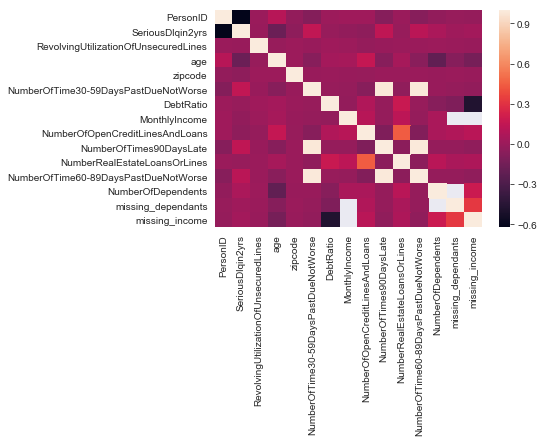

In [33]:
ed.correlation_graph(data)

In [5]:
fre_tables = ed.freq_tables(data, cat_columns, data_id)
fre_tables

{'SeriousDlqin2yrs': SeriousDlqin2yrs
 0    34396
 1     6620
 Name: PersonID, dtype: int64, 'zipcode': zipcode
 60601     6427
 60618     6332
 60625    12904
 60629     6459
 60637     6354
 60644     2540
 Name: PersonID, dtype: int64, 'NumberOfOpenCreditLinesAndLoans': NumberOfOpenCreditLinesAndLoans
 0      658
 1     1326
 2     1874
 3     2537
 4     3184
 5     3484
 6     3623
 7     3565
 8     3340
 9     3103
 10    2568
 11    2249
 12    1947
 13    1518
 14    1233
 15    1008
 16     835
 17     636
 18     483
 19     416
 20     343
 21     228
 22     177
 23     153
 24     115
 25      91
 26      68
 27      56
 28      38
 29      31
 30      23
 31      16
 32      18
 33      15
 34      14
 35       9
 36       5
 37       2
 38       4
 39       4
 40       2
 42       2
 43       4
 45       3
 48       1
 49       2
 50       1
 51       1
 52       2
 56       1
 Name: PersonID, dtype: int64, 'NumberOfTimes90DaysLate': NumberOfTimes90DaysLate
 0     37586

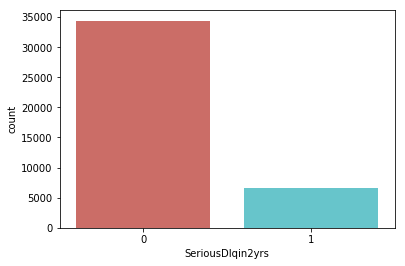

In [6]:
#Y values
data[y].value_counts()
ed.graph_dummy(y,data)





## Cleaning Data

In [7]:
#Replacing missing data by the mean
data['missing_dependants'] = data['NumberOfDependents'].notna()
data['missing_income'] = data['MonthlyIncome'].notna()
data_clean = cd.replace_missing(data)

#comment: there is a issue with debt ratio data when the income is 0 or null this provokes that the debt ratio are to high
data_clean = data_clean[data_clean['MonthlyIncome'] != 0]
data_Ratio = data_clean.groupby(data['missing_income'])['DebtRatio'].describe()
data_Ratio


,count,mean,std,min,25%,50%,75%,max
missing_income,,,,,,,,
False,7974.0,1604.300100,2356.503190,0.0,118.250000,1109.000000,2314.500000,106885.0
True,32650.0,4.741714,97.696926,0.0,0.143952,0.295505,0.483414,5774.5


Then we can drop this observation because this will generate bias even if we replace for mean. Actually we have two option first we run the model only with 32k observation or we run the whole model without the debt ratio. Also, we drop the observation of the variable Number of Times 60-90 days pas due not worse, because they are equal for the set of variables days past due not worse in general. 


In [8]:
data_clean = data_clean[data_clean['missing_income'] != False]
data_clean = data_clean[data_clean['NumberOfTime60-89DaysPastDueNotWorse'] != 98]
data_clean = data_clean[data_clean['NumberOfTime60-89DaysPastDueNotWorse'] != 96]

## Creating features

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


6     2888
7     2871
8     2702
5     2701
9     2569
4     2347
10    2151
11    1881
3     1853
12    1665
13    1297
2     1297
14    1045
15     867
1      849
16     727
17     542
18     407
0      349
19     347
20     294
21     198
22     156
23     135
24      94
25      79
26      59
27      50
28      34
29      27
30      19
32      18
31      13
34      12
33      11
35       8
36       5
39       4
38       3
37       2
45       2
40       2
42       2
49       2
43       2
52       2
51       1
48       1
50       1
56       1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

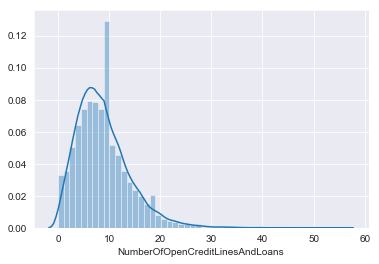

In [9]:
ed.histogram(data_clean.NumberOfOpenCreditLinesAndLoans)
data_clean['NumberOfOpenCreditLinesAndLoans'].value_counts()

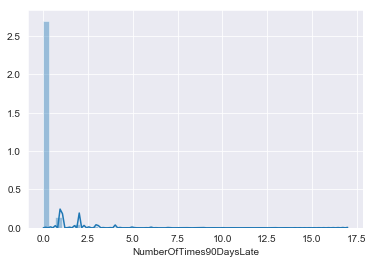

In [10]:
# NumberOfTimes90DaysLate
ed.histogram(data_clean.NumberOfTimes90DaysLate)


In [11]:
data_clean.NumberOfTimes90DaysLate.value_counts()


0     29910
1      1620
2       553
3       264
4       121
5        49
6        28
7        18
9         9
8         7
10        4
13        3
12        2
14        1
11        1
17        1
15        1
Name: NumberOfTimes90DaysLate, dtype: int64

In [12]:
data_clean.NumberOfTimes90DaysLate.describe()


count    32592.000000
mean         0.148441
std          0.649389
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: NumberOfTimes90DaysLate, dtype: float64

We can see that the values that are greater than zero concetrate in a small distribution of values, then we use a dummy for only postive values.

In [13]:
data_clean['d_90DaysLate'] = np.where(data_clean['NumberOfTimes90DaysLate']>1, 1, 0)


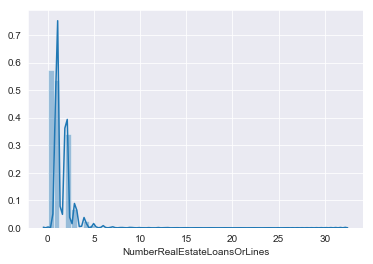

In [14]:
#NumberRealEstateLoansOrLines
ed.histogram(data_clean.NumberRealEstateLoansOrLines)


In [15]:
data_clean['NumberRealEstateLoansOrLines'].value_counts()


0     11977
1     11177
2      7102
3      1434
4       504
5       179
6        89
7        48
9        23
8        18
10        9
12        9
13        7
11        6
15        3
14        2
25        1
19        1
17        1
32        1
16        1
Name: NumberRealEstateLoansOrLines, dtype: int64

We notice that most of the observation are concentrated in the values 0,1,2 then we create three dummies for the values 1, 2 and greater than 2

In [16]:
data_clean['d_nrealstates1'] = np.where(data_clean['NumberRealEstateLoansOrLines'] == 1, 1, 0)
data_clean['d_nrealstates2'] = np.where(data_clean['NumberRealEstateLoansOrLines'] == 2, 1, 0)
data_clean['d_nrealstates3'] = np.where(data_clean['NumberRealEstateLoansOrLines'] > 2, 1, 0)


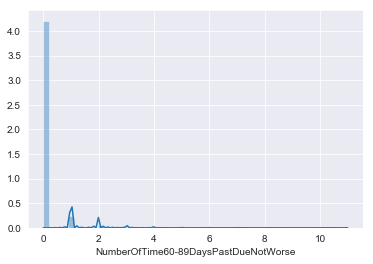

In [17]:
#NumberOfTime60-89DaysPastDueNotWorse
ed.histogram(data_clean['NumberOfTime60-89DaysPastDueNotWorse'])


In [18]:
data_clean['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()


0     30186
1      1792
2       411
3       130
4        47
5        13
6         8
7         3
11        1
8         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [19]:
data_clean['NumberOfTime60-89DaysPastDueNotWorse'].describe()


count    32592.000000
mean         0.102633
std          0.427625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64

we see that also its concentrate in a small values that are positive then we select only a dummy for the observation that are positive.

In [20]:
data_clean['d_60-89DaysPastDueNotWorse'] = np.where(data_clean['NumberOfTime60-89DaysPastDueNotWorse']>1, 1, 0)


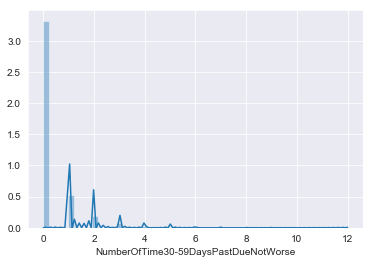

In [21]:
#NumberOfTime30-59DaysPastDueNotWorse
ed.histogram(data_clean['NumberOfTime30-59DaysPastDueNotWorse'])



In [22]:
data_clean['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()


0     25994
1      4108
2      1421
3       583
4       262
5       123
6        57
7        23
8        10
9         7
10        3
12        1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [23]:
data_clean['NumberOfTime30-59DaysPastDueNotWorse'].describe()

count    32592.000000
mean         0.339040
std          0.847154
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64

As we see, the values of thos variable concentrate in 0,1 2 and 3. Then we generate three dummies variables

In [24]:
data_clean['d_Time30-59_1'] = np.where(data_clean['NumberRealEstateLoansOrLines'] == 1, 1, 0)
data_clean['d_Time30-59_2'] = np.where(data_clean['NumberRealEstateLoansOrLines'] == 2, 1, 0)
data_clean['d_Time30-59_3'] = np.where(data_clean['NumberRealEstateLoansOrLines'] > 2, 1, 0)

Now generate the dummy for every zipcode.

In [25]:
df_zipcode= pd.get_dummies(data_clean['zipcode'])

In [26]:
#features
X_col = float_columns.copy()
X_col.append('NumberOfOpenCreditLinesAndLoans')
X_col.append('d_90DaysLate')
X_col.append('d_nrealstates1')
X_col.append('d_nrealstates2')
X_col.append('d_nrealstates3')
X_col.append('d_60-89DaysPastDueNotWorse')
X_col.append('d_Time30-59_1')
X_col.append('d_Time30-59_2')
X_col.append('d_Time30-59_3')


In [27]:
X = data_clean[X_col]
X = X.join(df_zipcode)
Y=data_clean['SeriousDlqin2yrs']

In [28]:
X_train, X_test, y_train, y_test = bm.gen_train_test_data(X,Y,.3)

## Training the model

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
bm.predict_result(X_test, y_test, logreg)

Accuracy of logistic regression classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8118
           1       0.70      0.21      0.33      1660

   micro avg       0.85      0.85      0.85      9778
   macro avg       0.78      0.60      0.62      9778
weighted avg       0.83      0.85      0.82      9778



array([[7964,  154],
       [1307,  353]])

In general we see that the model fit 85% of the cases in the test data, which is not a bad result.

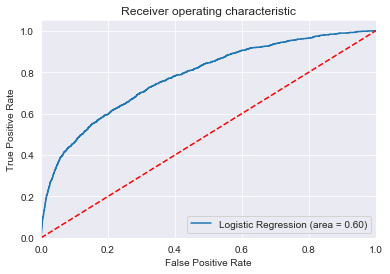

In [32]:
bm.auc_roc_graph(X_test, y_test, logreg)